#Agenda

##To detect fraud for transactions in a payment gateway 

##Business Problem
A new disruptive payment gateway start-up, ‘IndAvenue’, has started gaining traction
due to its extremely low processing fees for handling online vendors’ digital payments.
This strategy has led to very low costs of acquiring new vendors.
Due to this,the company was not able to build a fast and robust fraud detection system.
The company’s data engineers curated a dataset that they believe follows the real world distribution of transactions on their payment gateway. The company hired Insofe and provided it with the dataset, to create a fast and robust AI based model that can detect and prevent fraudulent transactions on its payment gateway.



##Importing the necessary Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Loading and Reading the Data

In [8]:
d1=pd.read_csv("train_data-1611220940820.csv",na_values=["?",",","#"])

In [9]:
d2=pd.read_csv("test_data-1611220982388.csv",na_values=["?",",","#"])

##Analyze the data

*   shape
*   head
*   tail
*   columns
*   describe the data
*   data types


In [10]:
d1.shape        #prints the no. of rows and columns in the data

(76529, 11)

In [11]:
d2.shape

(19133, 10)

In [12]:
d1.head()         #prints the top 5 rows of data

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0


In [13]:
d2.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category
0,857050141038272,3802500,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-12-28 14:44:37+00:00,2
1,4400462872603,200704,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2016-12-14 17:49:48+00:00,2
2,1207915598569499,25150225,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2017-01-21 10:18:11+00:00,2
3,2009725616777536,21827584,visa_master_credit_cards,78890,cat_2,IND_INR,other_pcs,200.0,2017-01-16 13:25:10+00:00,1
4,2319205210274863,576081,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,100.0,2017-02-09 12:47:28+00:00,2


In [14]:
d1.tail()       #prints the bottom 5 rows of the data

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
76524,179759462245453,19686969,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2016-11-30 13:40:45+00:00,2,0
76525,2693567760244353,11662225,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2017-01-08 08:35:31+00:00,2,0
76526,119750257089000,374544,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-3.5,2016-12-26 21:47:08+00:00,2,0
76527,1949798765017089,1687401,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-20.0,2016-12-11 13:44:06+00:00,2,0
76528,1051344513778987,6754801,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2017-01-11 19:08:18+00:00,2,0


In [15]:
d2.tail()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category
19128,5332775378111,13235044,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2017-01-01 13:02:16+00:00,2
19129,939262915465237,12257001,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,30.0,2016-12-26 19:41:23+00:00,2
19130,18324574916544,5958481,visa_master_debit_cards,23667,cat_2,IND_INR,other_pcs,20.0,2016-12-24 04:29:06+00:00,4
19131,893473728055875,53919649,sbi_atm_cum_debit_card,78890,cat_2,IND_INR,android_devices,-500.0,2016-12-04 15:38:47+00:00,4
19132,84390778936647,14500864,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,40.0,2017-01-12 21:24:24+00:00,2


In [16]:
d1.columns              #prints the column names available in the data

Index(['transaction_number', 'user_id', 'payment_method', 'partner_id',
       'partner_category', 'country', 'device_type', 'money_transacted',
       'transaction_initiation', 'partner_pricing_category', 'is_fraud'],
      dtype='object')

In [17]:
d2.columns

Index(['transaction_number', 'user_id', 'payment_method', 'partner_id',
       'partner_category', 'country', 'device_type', 'money_transacted',
       'transaction_initiation', 'partner_pricing_category'],
      dtype='object')

In [18]:
d1.describe(include="all")        #gives the complete summary of data

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
count,7.652900e+04,7.652900e+04,76529,76529.000000,76529,76529,76529,76529.000000,76529,76529.000000,76529.000000
unique,NaN,NaN,6,NaN,9,1,4,NaN,75811,NaN,NaN
top,NaN,NaN,sbi_atm_cum_debit_card,NaN,cat_1,IND_INR,other_pcs,NaN,2016-12-24 16:30:13+00:00,NaN,NaN
freq,NaN,NaN,30538,NaN,36306,76529,45560,NaN,12,NaN,NaN
mean,6.940200e+14,1.247483e+07,NaN,58497.189105,NaN,NaN,NaN,132.724348,NaN,2.255707,0.002012
std,7.867885e+14,1.205878e+07,NaN,36740.216787,NaN,NaN,NaN,2350.110900,NaN,0.732174,0.044814
min,8.000000e+00,1.000000e+00,NaN,7889.000000,NaN,NaN,NaN,-20000.000000,NaN,0.000000,0.000000
25%,4.387866e+13,3.515625e+06,NaN,23667.000000,NaN,NaN,NaN,-1.000000,NaN,2.000000,0.000000
50%,3.452540e+14,9.753129e+06,NaN,47334.000000,NaN,NaN,NaN,20.000000,NaN,2.000000,0.000000
75%,1.173440e+15,1.788444e+07,NaN,78890.000000,NaN,NaN,NaN,52.000000,NaN,2.000000,0.000000


In [19]:
d2.describe(include="all")

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category
count,1.913300e+04,1.913300e+04,19133,19133.000000,19133,19133,19133,19133.000000,19133,19133.000000
unique,NaN,NaN,6,NaN,8,1,4,NaN,19090,NaN
top,NaN,NaN,sbi_atm_cum_debit_card,NaN,cat_1,IND_INR,other_pcs,NaN,2016-12-24 16:30:13+00:00,NaN
freq,NaN,NaN,7651,NaN,9099,19133,11375,NaN,5,NaN
mean,7.037622e+14,1.261609e+07,NaN,58656.424084,NaN,NaN,NaN,140.886995,NaN,2.257043
std,7.946458e+14,1.228365e+07,NaN,36692.507399,NaN,NaN,NaN,2883.975048,NaN,0.735934
min,1.000000e+00,3.600000e+01,NaN,7889.000000,NaN,NaN,NaN,-20000.000000,NaN,0.000000
25%,4.313645e+13,3.515625e+06,NaN,23667.000000,NaN,NaN,NaN,-1.000000,NaN,2.000000
50%,3.585617e+14,9.922500e+06,NaN,47334.000000,NaN,NaN,NaN,20.000000,NaN,2.000000
75%,1.184018e+15,1.796064e+07,NaN,78890.000000,NaN,NaN,NaN,60.000000,NaN,2.000000


In [20]:
d1.dtypes             #print the data types of all attributes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
is_fraud                      int64
dtype: object

In [21]:
d2.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
dtype: object

##Exploratory Data Analysis
*Histogram Plot

*Density Plot

*Box Plot

<AxesSubplot:ylabel='Frequency'>

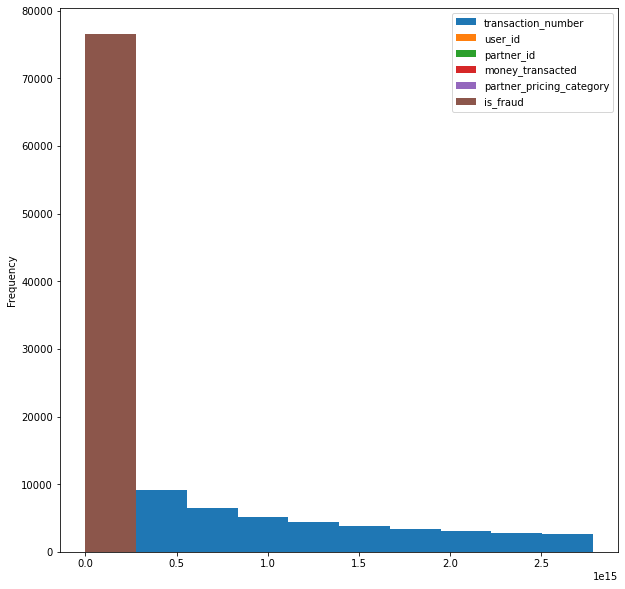

In [22]:
from matplotlib.pyplot import subplots
d1.plot(kind='hist',sharex=False,sharey=False,layout=(3,3),figsize=(10,10))

<AxesSubplot:ylabel='Frequency'>

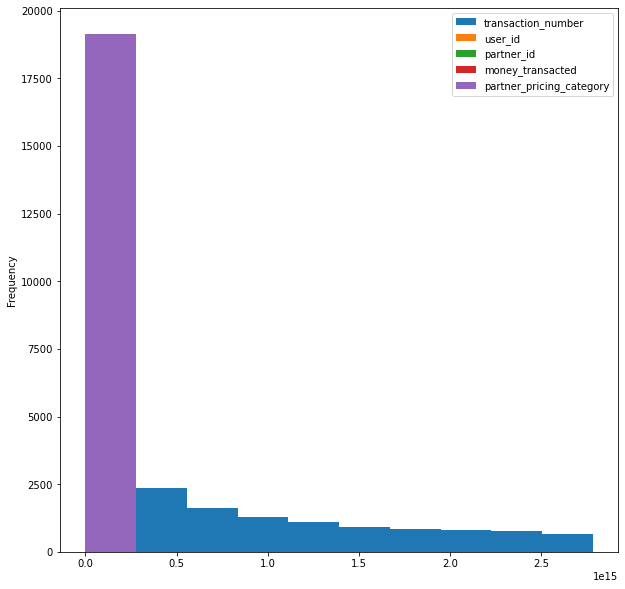

In [23]:
from matplotlib.pyplot import subplots
d2.plot(kind='hist',sharex=False,sharey=False,layout=(3,3),figsize=(10,10))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

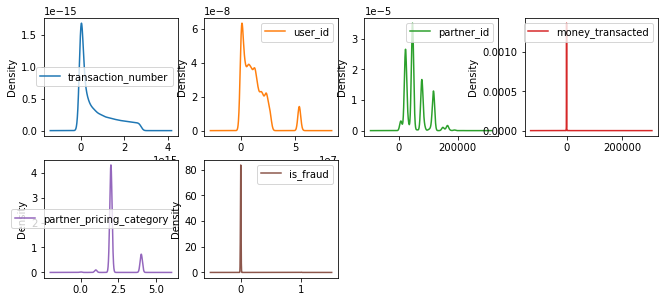

In [24]:
from matplotlib.pyplot import subplots
d1.plot(kind='density',subplots=True,sharex=False,sharey=False,layout=(4,4),figsize=(11,10))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

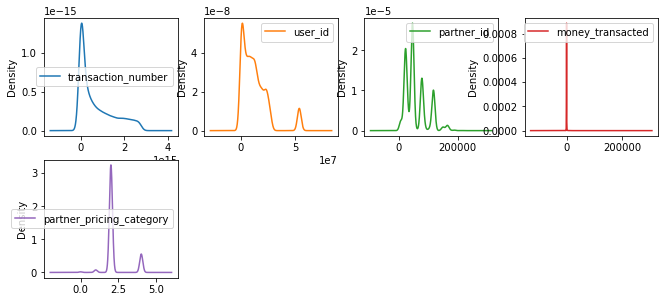

In [25]:
from matplotlib.pyplot import subplots
d2.plot(kind='density',subplots=True,sharex=False,sharey=False,layout=(4,4),figsize=(11,10))

transaction_number              AxesSubplot(0.125,0.71587;0.168478x0.16413)
user_id                      AxesSubplot(0.327174,0.71587;0.168478x0.16413)
partner_id                   AxesSubplot(0.529348,0.71587;0.168478x0.16413)
money_transacted             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
partner_pricing_category       AxesSubplot(0.125,0.518913;0.168478x0.16413)
is_fraud                    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
dtype: object

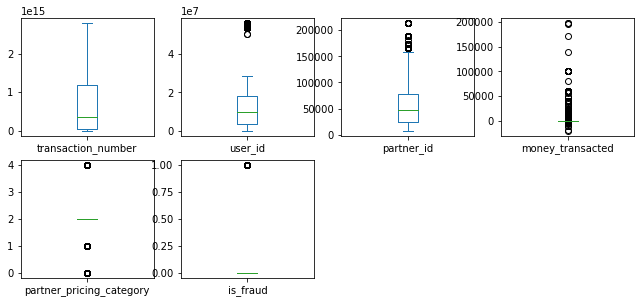

In [26]:
from matplotlib.pyplot import subplots
d1.plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(4,4),figsize=(11,10))

transaction_number             AxesSubplot(0.125,0.71587;0.168478x0.16413)
user_id                     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
partner_id                  AxesSubplot(0.529348,0.71587;0.168478x0.16413)
money_transacted            AxesSubplot(0.731522,0.71587;0.168478x0.16413)
partner_pricing_category      AxesSubplot(0.125,0.518913;0.168478x0.16413)
dtype: object

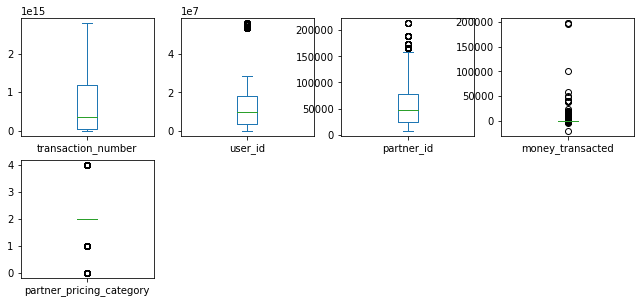

In [27]:
from matplotlib.pyplot import subplots
d2.plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(4,4),figsize=(11,10))

In [28]:
q1=d2['user_id'].quantile(0.25)
q3=d2['user_id'].quantile(0.70)
iqr = q3-q1
filter1 = (d2['user_id']>=q1 - 1.5*iqr) & (d2['user_id']<=q3+1.5*iqr)
d2=d2.loc[filter1]

In [29]:
q1=d1['partner_id'].quantile(0.25)
q3=d1['partner_id'].quantile(0.70)
iqr = q3-q1
filter1 = (d1['partner_id']>=q1 - 1.5*iqr) & (d1['partner_id']<=q3+1.5*iqr)
d1=d1.loc[filter1]

In [30]:
q1=d2['partner_id'].quantile(0.25)
q3=d2['partner_id'].quantile(0.70)
iqr = q3-q1
filter1 = (d2['partner_id']>=q1 - 1.5*iqr) & (d2['partner_id']<=q3+1.5*iqr)
d2=d2.loc[filter1]

transaction_number              AxesSubplot(0.125,0.71587;0.168478x0.16413)
user_id                      AxesSubplot(0.327174,0.71587;0.168478x0.16413)
partner_id                   AxesSubplot(0.529348,0.71587;0.168478x0.16413)
money_transacted             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
partner_pricing_category       AxesSubplot(0.125,0.518913;0.168478x0.16413)
is_fraud                    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
dtype: object

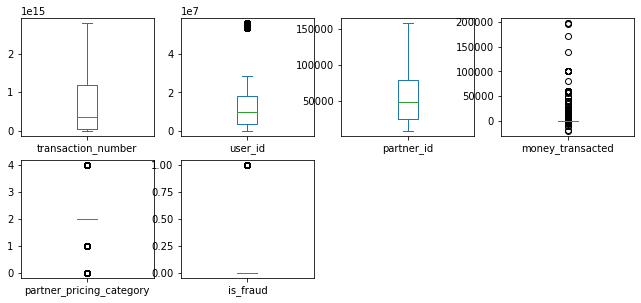

In [31]:
from matplotlib.pyplot import subplots
d1.plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(4,4),figsize=(11,10))

transaction_number             AxesSubplot(0.125,0.71587;0.168478x0.16413)
user_id                     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
partner_id                  AxesSubplot(0.529348,0.71587;0.168478x0.16413)
money_transacted            AxesSubplot(0.731522,0.71587;0.168478x0.16413)
partner_pricing_category      AxesSubplot(0.125,0.518913;0.168478x0.16413)
dtype: object

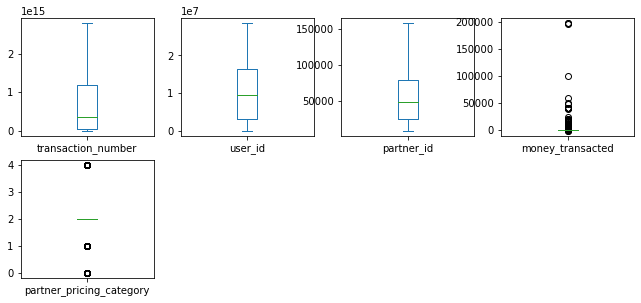

In [32]:
from matplotlib.pyplot import subplots
d2.plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(4,4),figsize=(11,10))

##Correlation Plot

####To check relation between numeric attributes

<AxesSubplot:>

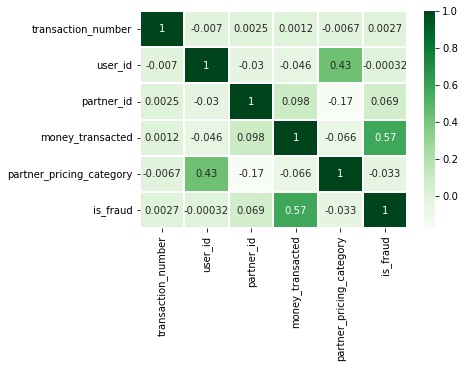

In [33]:
import seaborn as sns
sns.heatmap(d1.corr(),cmap='Greens',annot=True,linewidths=0.1)

<AxesSubplot:>

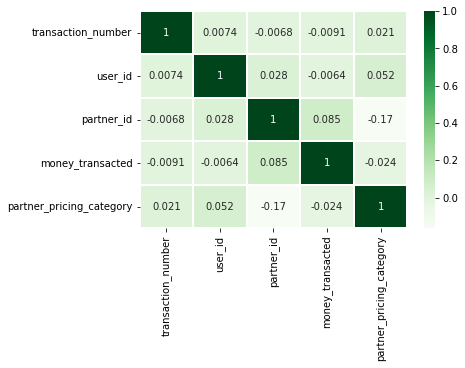

In [34]:
import seaborn as sns
sns.heatmap(d2.corr(),cmap='Greens',annot=True,linewidths=0.1)

In [35]:
for i in d1:
  print(d1[i].nunique())
  print(d1[i].value_counts())

75052
144703125000        1
42764844473000      1
268323644443499     1
1649305768375000    1
872051380075819     1
                   ..
42651215478019      1
2010346772547329    1
461800293447375     1
832016254469464     1
1051344513778987    1
Name: transaction_number, Length: 75052, dtype: int64
3575
53919649    3239
13205956    1656
418609      1514
1201216      622
16265089     611
            ... 
6431296        1
23386896       1
9715689        1
594441         1
27952369       1
Name: user_id, Length: 3575, dtype: int64
6
sbi_atm_cum_debit_card        30464
e_wallet_payments             26545
visa_master_debit_cards       11346
other_debit_cards              4353
visa_master_credit_cards       2330
unified_payments_interface       14
Name: payment_method, dtype: int64
18
47334     26105
23667     19526
78890     12273
118335     9546
7889       2317
31556      1892
86779      1121
149891      767
110446      640
102557      231
15778       189
157780      165
63112       159


In [36]:
for i in d2:
  print(d1[i].nunique())
  print(d1[i].value_counts())

75052
144703125000        1
42764844473000      1
268323644443499     1
1649305768375000    1
872051380075819     1
                   ..
42651215478019      1
2010346772547329    1
461800293447375     1
832016254469464     1
1051344513778987    1
Name: transaction_number, Length: 75052, dtype: int64
3575
53919649    3239
13205956    1656
418609      1514
1201216      622
16265089     611
            ... 
6431296        1
23386896       1
9715689        1
594441         1
27952369       1
Name: user_id, Length: 3575, dtype: int64
6
sbi_atm_cum_debit_card        30464
e_wallet_payments             26545
visa_master_debit_cards       11346
other_debit_cards              4353
visa_master_credit_cards       2330
unified_payments_interface       14
Name: payment_method, dtype: int64
18
47334     26105
23667     19526
78890     12273
118335     9546
7889       2317
31556      1892
86779      1121
149891      767
110446      640
102557      231
15778       189
157780      165
63112       159


In [37]:
d1.isnull().sum()

transaction_number          0
user_id                     0
payment_method              0
partner_id                  0
partner_category            0
country                     0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
is_fraud                    0
dtype: int64

In [38]:
d2.isnull().sum()

transaction_number          0
user_id                     0
payment_method              0
partner_id                  0
partner_category            0
country                     0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
dtype: int64

##Dropping unimportant attributes


In [39]:
d1.drop(['country','transaction_number'],axis=1,inplace=True)

In [40]:
d2.drop(['country','transaction_number'],axis=1,inplace=True)

In [41]:
d1.columns

Index(['user_id', 'payment_method', 'partner_id', 'partner_category',
       'device_type', 'money_transacted', 'transaction_initiation',
       'partner_pricing_category', 'is_fraud'],
      dtype='object')

In [42]:
d2.columns

Index(['user_id', 'payment_method', 'partner_id', 'partner_category',
       'device_type', 'money_transacted', 'transaction_initiation',
       'partner_pricing_category'],
      dtype='object')

##Feature Engineering for Transaction Initiation

In [43]:
d1['transaction_initiation'] = pd.to_datetime(d1['transaction_initiation'])

In [44]:
d2['transaction_initiation'] = pd.to_datetime(d2['transaction_initiation'])

In [45]:
d1['year'] = d1['transaction_initiation'].dt.year
d1['month'] = d1['transaction_initiation'].dt.month
d1['day'] = d1['transaction_initiation'].dt.day
d1['time'] = d1['transaction_initiation'].dt.time
d1.drop(columns='transaction_initiation', axis='column', inplace=True)

In [46]:
d2['year'] = d2['transaction_initiation'].dt.year
d2['month'] = d2['transaction_initiation'].dt.month
d2['day'] = d2['transaction_initiation'].dt.day
d2['time'] = d2['transaction_initiation'].dt.time
d2.drop(columns='transaction_initiation', axis='column', inplace=True)

In [47]:
d1.dtypes

user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
device_type                  object
money_transacted            float64
partner_pricing_category      int64
is_fraud                      int64
year                          int64
month                         int64
day                           int64
time                         object
dtype: object

In [48]:
d2.dtypes

user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
device_type                  object
money_transacted            float64
partner_pricing_category      int64
year                          int64
month                         int64
day                           int64
time                         object
dtype: object

##Converting Object variable to Categorical Type


In [49]:
cat_attr=['payment_method','partner_category','device_type','time']
d1[cat_attr]=d1[cat_attr].astype('category')

In [50]:
cat_attr_d2=['payment_method','partner_category','device_type','time']
d2[cat_attr_d2]=d2[cat_attr_d2].astype('category')

In [51]:
num_attr=d1.select_dtypes(['int64','float64']).columns

In [52]:
num_attr_d2=d2.select_dtypes(['int64','float64']).columns

In [53]:
print(num_attr)

Index(['user_id', 'partner_id', 'money_transacted', 'partner_pricing_category',
       'is_fraud', 'year', 'month', 'day'],
      dtype='object')


In [54]:
print(num_attr_d2)

Index(['user_id', 'partner_id', 'money_transacted', 'partner_pricing_category',
       'year', 'month', 'day'],
      dtype='object')


In [55]:
d1.dtypes

user_id                        int64
payment_method              category
partner_id                     int64
partner_category            category
device_type                 category
money_transacted             float64
partner_pricing_category       int64
is_fraud                       int64
year                           int64
month                          int64
day                            int64
time                        category
dtype: object

In [56]:
d2.dtypes

user_id                        int64
payment_method              category
partner_id                     int64
partner_category            category
device_type                 category
money_transacted             float64
partner_pricing_category       int64
year                           int64
month                          int64
day                            int64
time                        category
dtype: object

In [57]:
d1.drop(['time'],axis=1,inplace=True)

In [58]:
d2.drop(['time'],axis=1,inplace=True)

In [59]:
d1.columns

Index(['user_id', 'payment_method', 'partner_id', 'partner_category',
       'device_type', 'money_transacted', 'partner_pricing_category',
       'is_fraud', 'year', 'month', 'day'],
      dtype='object')

In [60]:
d2.columns

Index(['user_id', 'payment_method', 'partner_id', 'partner_category',
       'device_type', 'money_transacted', 'partner_pricing_category', 'year',
       'month', 'day'],
      dtype='object')

In [61]:
d1.shape

(75052, 11)

In [62]:
d2.shape

(17822, 10)

##Encoding


*   Creating Dummies




In [63]:
cat1=pd.get_dummies(d1['partner_category'])
cat1

,cat_1,cat_2,cat_3,cat_4,cat_5,cat_7,cat_8,cat_9
0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
76524,1,0,0,0,0,0,0,0
76525,1,0,0,0,0,0,0,0
76526,1,0,0,0,0,0,0,0
76527,1,0,0,0,0,0,0,0


In [64]:
cat1_test=pd.get_dummies(d2['partner_category'])
cat1_test

,cat_1,cat_2,cat_3,cat_4,cat_5,cat_7,cat_8
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
19127,0,1,0,0,0,0,0
19128,0,1,0,0,0,0,0
19129,0,1,0,0,0,0,0
19130,0,1,0,0,0,0,0


In [65]:
cat2=pd.get_dummies(d1['payment_method'])
cat2

,e_wallet_payments,other_debit_cards,sbi_atm_cum_debit_card,unified_payments_interface,visa_master_credit_cards,visa_master_debit_cards
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
76524,0,0,1,0,0,0
76525,0,0,0,0,0,1
76526,0,0,1,0,0,0
76527,0,0,1,0,0,0


In [66]:
cat2_test=pd.get_dummies(d2['payment_method'])
cat2_test

,e_wallet_payments,other_debit_cards,sbi_atm_cum_debit_card,unified_payments_interface,visa_master_credit_cards,visa_master_debit_cards
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
19127,1,0,0,0,0,0
19128,1,0,0,0,0,0
19129,1,0,0,0,0,0
19130,0,0,0,0,0,1


In [67]:
cat3=pd.get_dummies(d1['device_type'])
cat3

,android_devices,ios_devices,other_pcs,windows_pcs
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
76524,1,0,0,0
76525,0,0,1,0
76526,1,0,0,0
76527,1,0,0,0


In [68]:
cat3_test=pd.get_dummies(d2['device_type'])
cat3_test

,android_devices,ios_devices,other_pcs,windows_pcs
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
19127,0,0,1,0
19128,0,0,1,0
19129,0,0,1,0
19130,0,0,1,0


In [69]:
fraud=pd.get_dummies(d1['is_fraud'],drop_first=True)

In [70]:
final_d1=pd.concat([d1,fraud,cat1,cat2,cat3],axis=1)
final_d1

,user_id,payment_method,partner_id,partner_category,device_type,money_transacted,partner_pricing_category,is_fraud,year,month,...,e_wallet_payments,other_debit_cards,sbi_atm_cum_debit_card,unified_payments_interface,visa_master_credit_cards,visa_master_debit_cards,android_devices,ios_devices,other_pcs,windows_pcs
0,17539344,sbi_atm_cum_debit_card,47334,cat_1,android_devices,-5.0,2,0,2016,11,...,0,0,1,0,0,0,1,0,0,0
1,24710841,e_wallet_payments,78890,cat_2,other_pcs,100.0,2,0,2017,1,...,1,0,0,0,0,0,0,0,1,0
2,24265476,e_wallet_payments,78890,cat_2,other_pcs,50.0,2,0,2016,12,...,1,0,0,0,0,0,0,0,1,0
3,10240000,other_debit_cards,102557,cat_3,other_pcs,1000.0,2,0,2017,1,...,0,1,0,0,0,0,0,0,1,0
4,5880625,other_debit_cards,118335,cat_1,other_pcs,200.0,2,0,2016,11,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76524,19686969,sbi_atm_cum_debit_card,47334,cat_1,android_devices,-100.0,2,0,2016,11,...,0,0,1,0,0,0,1,0,0,0
76525,11662225,visa_master_debit_cards,118335,cat_1,other_pcs,200.0,2,0,2017,1,...,0,0,0,0,0,1,0,0,1,0
76526,374544,sbi_atm_cum_debit_card,47334,cat_1,android_devices,-3.5,2,0,2016,12,...,0,0,1,0,0,0,1,0,0,0
76527,1687401,sbi_atm_cum_debit_card,47334,cat_1,android_devices,-20.0,2,0,2016,12,...,0,0,1,0,0,0,1,0,0,0


In [71]:
final_d2=pd.concat([d2,cat1_test,cat2_test,cat3_test],axis=1)
final_d2

,user_id,payment_method,partner_id,partner_category,device_type,money_transacted,partner_pricing_category,year,month,day,...,e_wallet_payments,other_debit_cards,sbi_atm_cum_debit_card,unified_payments_interface,visa_master_credit_cards,visa_master_debit_cards,android_devices,ios_devices,other_pcs,windows_pcs
0,3802500,visa_master_debit_cards,118335,cat_1,other_pcs,200.0,2,2016,12,28,...,0,0,0,0,0,1,0,0,1,0
1,200704,e_wallet_payments,23667,cat_2,other_pcs,20.0,2,2016,12,14,...,1,0,0,0,0,0,0,0,1,0
2,25150225,sbi_atm_cum_debit_card,47334,cat_1,android_devices,-100.0,2,2017,1,21,...,0,0,1,0,0,0,1,0,0,0
3,21827584,visa_master_credit_cards,78890,cat_2,other_pcs,200.0,1,2017,1,16,...,0,0,0,0,1,0,0,0,1,0
4,576081,e_wallet_payments,23667,cat_2,other_pcs,100.0,2,2017,2,9,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19127,17665209,e_wallet_payments,7889,cat_2,other_pcs,80.0,2,2017,2,4,...,1,0,0,0,0,0,0,0,1,0
19128,13235044,e_wallet_payments,23667,cat_2,other_pcs,20.0,2,2017,1,1,...,1,0,0,0,0,0,0,0,1,0
19129,12257001,e_wallet_payments,78890,cat_2,other_pcs,30.0,2,2016,12,26,...,1,0,0,0,0,0,0,0,1,0
19130,5958481,visa_master_debit_cards,23667,cat_2,other_pcs,20.0,4,2016,12,24,...,0,0,0,0,0,1,0,0,1,0


In [72]:
final_d1.dtypes

user_id                          int64
payment_method                category
partner_id                       int64
partner_category              category
device_type                   category
money_transacted               float64
partner_pricing_category         int64
is_fraud                         int64
year                             int64
month                            int64
day                              int64
1                                uint8
cat_1                            uint8
cat_2                            uint8
cat_3                            uint8
cat_4                            uint8
cat_5                            uint8
cat_7                            uint8
cat_8                            uint8
cat_9                            uint8
e_wallet_payments                uint8
other_debit_cards                uint8
sbi_atm_cum_debit_card           uint8
unified_payments_interface       uint8
visa_master_credit_cards         uint8
visa_master_debit_cards  

In [73]:
final_d2.dtypes

user_id                          int64
payment_method                category
partner_id                       int64
partner_category              category
device_type                   category
money_transacted               float64
partner_pricing_category         int64
year                             int64
month                            int64
day                              int64
cat_1                            uint8
cat_2                            uint8
cat_3                            uint8
cat_4                            uint8
cat_5                            uint8
cat_7                            uint8
cat_8                            uint8
e_wallet_payments                uint8
other_debit_cards                uint8
sbi_atm_cum_debit_card           uint8
unified_payments_interface       uint8
visa_master_credit_cards         uint8
visa_master_debit_cards          uint8
android_devices                  uint8
ios_devices                      uint8
other_pcs                

In [74]:
final_d1.drop(['payment_method','partner_category','device_type'],axis=1,inplace=True)

In [75]:
final_d2.drop(['payment_method','partner_category','device_type'],axis=1,inplace=True)

In [76]:
final_d1.dtypes

user_id                         int64
partner_id                      int64
money_transacted              float64
partner_pricing_category        int64
is_fraud                        int64
year                            int64
month                           int64
day                             int64
1                               uint8
cat_1                           uint8
cat_2                           uint8
cat_3                           uint8
cat_4                           uint8
cat_5                           uint8
cat_7                           uint8
cat_8                           uint8
cat_9                           uint8
e_wallet_payments               uint8
other_debit_cards               uint8
sbi_atm_cum_debit_card          uint8
unified_payments_interface      uint8
visa_master_credit_cards        uint8
visa_master_debit_cards         uint8
android_devices                 uint8
ios_devices                     uint8
other_pcs                       uint8
windows_pcs 

In [77]:
final_d1.drop([1],axis=1,inplace=True)

In [78]:
final_d1.columns

Index(['user_id', 'partner_id', 'money_transacted', 'partner_pricing_category',
       'is_fraud', 'year', 'month', 'day', 'cat_1', 'cat_2', 'cat_3', 'cat_4',
       'cat_5', 'cat_7', 'cat_8', 'cat_9', 'e_wallet_payments',
       'other_debit_cards', 'sbi_atm_cum_debit_card',
       'unified_payments_interface', 'visa_master_credit_cards',
       'visa_master_debit_cards', 'android_devices', 'ios_devices',
       'other_pcs', 'windows_pcs'],
      dtype='object')

In [79]:
final_d2.dtypes

user_id                         int64
partner_id                      int64
money_transacted              float64
partner_pricing_category        int64
year                            int64
month                           int64
day                             int64
cat_1                           uint8
cat_2                           uint8
cat_3                           uint8
cat_4                           uint8
cat_5                           uint8
cat_7                           uint8
cat_8                           uint8
e_wallet_payments               uint8
other_debit_cards               uint8
sbi_atm_cum_debit_card          uint8
unified_payments_interface      uint8
visa_master_credit_cards        uint8
visa_master_debit_cards         uint8
android_devices                 uint8
ios_devices                     uint8
other_pcs                       uint8
windows_pcs                     uint8
dtype: object

In [80]:
final_d1

,user_id,partner_id,money_transacted,partner_pricing_category,is_fraud,year,month,day,cat_1,cat_2,...,e_wallet_payments,other_debit_cards,sbi_atm_cum_debit_card,unified_payments_interface,visa_master_credit_cards,visa_master_debit_cards,android_devices,ios_devices,other_pcs,windows_pcs
0,17539344,47334,-5.0,2,0,2016,11,15,1,0,...,0,0,1,0,0,0,1,0,0,0
1,24710841,78890,100.0,2,0,2017,1,11,0,1,...,1,0,0,0,0,0,0,0,1,0
2,24265476,78890,50.0,2,0,2016,12,7,0,1,...,1,0,0,0,0,0,0,0,1,0
3,10240000,102557,1000.0,2,0,2017,1,11,0,0,...,0,1,0,0,0,0,0,0,1,0
4,5880625,118335,200.0,2,0,2016,11,16,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76524,19686969,47334,-100.0,2,0,2016,11,30,1,0,...,0,0,1,0,0,0,1,0,0,0
76525,11662225,118335,200.0,2,0,2017,1,8,1,0,...,0,0,0,0,0,1,0,0,1,0
76526,374544,47334,-3.5,2,0,2016,12,26,1,0,...,0,0,1,0,0,0,1,0,0,0
76527,1687401,47334,-20.0,2,0,2016,12,11,1,0,...,0,0,1,0,0,0,1,0,0,0


In [81]:
final_d2

,user_id,partner_id,money_transacted,partner_pricing_category,year,month,day,cat_1,cat_2,cat_3,...,e_wallet_payments,other_debit_cards,sbi_atm_cum_debit_card,unified_payments_interface,visa_master_credit_cards,visa_master_debit_cards,android_devices,ios_devices,other_pcs,windows_pcs
0,3802500,118335,200.0,2,2016,12,28,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,200704,23667,20.0,2,2016,12,14,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,25150225,47334,-100.0,2,2017,1,21,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,21827584,78890,200.0,1,2017,1,16,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,576081,23667,100.0,2,2017,2,9,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19127,17665209,7889,80.0,2,2017,2,4,0,1,0,...,1,0,0,0,0,0,0,0,1,0
19128,13235044,23667,20.0,2,2017,1,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
19129,12257001,78890,30.0,2,2016,12,26,0,1,0,...,1,0,0,0,0,0,0,0,1,0
19130,5958481,23667,20.0,4,2016,12,24,0,1,0,...,0,0,0,0,0,1,0,0,1,0


####Value Counts

In [82]:
final_d1.value_counts('is_fraud')

is_fraud
0    74903
1      149
dtype: int64

##Train_test_split

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
y=final_d1['is_fraud']
X=final_d1.drop(['is_fraud','cat_9'],axis=1)

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [86]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60041, 24)
(15011, 24)
(60041,)
(15011,)


##Standardization

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler=StandardScaler()

In [89]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

##Model Building

#####Decision Tree Classifier

In [90]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [91]:
model_dtc=dtc.fit(X_train,y_train)

In [92]:
y_pred_train_dtc=model_dtc.predict(X_train)
y_pred_test_dtc=model_dtc.predict(X_test)

In [93]:
def error_metrics(test_data,pred_data):
  from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
  List=[accuracy_score(test_data,pred_data),recall_score(test_data,pred_data),precision_score(test_data,pred_data),f1_score(test_data,pred_data)]
  print('Accuracy score:\n',accuracy_score(test_data,pred_data))
  print('Recall score:\n',recall_score(test_data,pred_data))
  print('Precision score:\n',precision_score(test_data,pred_data))
  print('F1 score:\n',f1_score(test_data,pred_data))
  print(List)
a=['Accuracy_Score','Recall_Score','Precision_Score','F1_Score']

In [94]:
dtc_error_metrics_train=error_metrics(y_train,y_pred_train_dtc)

Accuracy score:
 0.9999333788577806
Recall score:
 0.967741935483871
Precision score:
 1.0
F1 score:
 0.9836065573770492
[0.9999333788577806, 0.967741935483871, 1.0, 0.9836065573770492]


In [95]:
dtc_error_metrics_test=error_metrics(y_test,y_pred_test_dtc)

Accuracy score:
 0.9998667643727933
Recall score:
 0.96
Precision score:
 0.96
F1 score:
 0.96
[0.9998667643727933, 0.96, 0.96, 0.96]


##Smote

In [96]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
  
# define dataset
x, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
  
# print the features and the labels
print('x_smote:\n', x_smote)
print('y_smote:\n', y_smote)

ModuleNotFoundError: No module named 'imblearn'

In [97]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [98]:
model_dtc=dtc.fit(X_train,y_train)

In [99]:
y_pred_train_dtc=model_dtc.predict(X_train)
y_pred_test_dtc=model_dtc.predict(X_test)

Error Metrics For Decision Tree Classifier

In [100]:
def error_metrics(test_data,pred_data):
  from sklearn.metrics import f1_score
  List=f1_score(test_data,pred_data)
  print('F1 score:\n',f1_score(test_data,pred_data))
  print(List)
a=['F1_Score']

In [101]:
dtc_error_metrics_train=error_metrics(y_train,y_pred_train_dtc)

F1 score:
 0.9836065573770492
0.9836065573770492


In [102]:
dtc_error_metrics_test=error_metrics(y_test,y_pred_test_dtc)

F1 score:
 0.96
0.96


In [103]:
scaler = StandardScaler()
scaler.fit(d2[num_attr_d2])
d2[num_attr_d2] = scaler.transform(d2[num_attr_d2])

In [121]:
d2_pred=dtc.predict(final_d2)

In [122]:
print(d2_pred)

[1 0 0 ... 1 0 1]


In [123]:
pd.DataFrame({"d2predict":test_pred}).to_csv("Submission.csv")

In [126]:
pd.read_csv("Submission.csv")

,Unnamed: 0,d2predict
0,0,1
1,1,0
2,2,0
3,3,1
4,4,1
...,...,...
17817,17817,1
17818,17818,0
17819,17819,1
17820,17820,0


In [105]:
for i in final_d1:
  print(i)

user_id
partner_id
money_transacted
partner_pricing_category
is_fraud
year
month
day
cat_1
cat_2
cat_3
cat_4
cat_5
cat_7
cat_8
cat_9
e_wallet_payments
other_debit_cards
sbi_atm_cum_debit_card
unified_payments_interface
visa_master_credit_cards
visa_master_debit_cards
android_devices
ios_devices
other_pcs
windows_pcs


In [106]:
for j in final_d2:
  print(j)


user_id
partner_id
money_transacted
partner_pricing_category
year
month
day
cat_1
cat_2
cat_3
cat_4
cat_5
cat_7
cat_8
e_wallet_payments
other_debit_cards
sbi_atm_cum_debit_card
unified_payments_interface
visa_master_credit_cards
visa_master_debit_cards
android_devices
ios_devices
other_pcs
windows_pcs


##RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier() 

In [ ]:
model_rfc=rfc.fit(X_train,y_train)


In [ ]:
y_pred_train_rfc=model_rfc.predict(X_train)
y_pred_test_rfc=model_rfc.predict(X_test)

Error Metrics for RandomForest Classifier

In [ ]:
rfc_error_metrics_train=error_metrics(y_train,y_pred_train_rfc)

In [ ]:
rfc_error_metrics_test=error_metrics(y_test,y_pred_test_rfc)

##KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN=KNeighborsClassifier()
KNN=KNN.fit(X_train,y_train)

In [ ]:
y_pred_test_KNN=KNN.predict(X_test)
y_pred_train_KNN=KNN.predict(X_train)
print(y_pred_test_KNN)

Error Metrics for KNN

In [ ]:
KNN_error_metrics_TRAIN=(error_metrics(y_train,y_pred_train_KNN))

In [ ]:
KNN_error_metrics_TEST=(error_metrics(y_test,y_pred_test_KNN))

##Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

In [ ]:
y_pred_train_svc_model =svc_model .predict(X_train)
y_pred_test_svc_model =svc_model .predict(X_test)
print(y_pred_test_svc_model )

Error Metrics for SVC

In [ ]:
svc_model_error_metrics_TRAIN=(error_metrics(y_train,y_pred_train_svc_model))

In [ ]:
svc_model_error_metrics_TEST=(error_metrics(y_test,y_pred_test_svc_model))

GridSearch for SVM